In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tvd

plt.rcParams["figure.figsize"] = (20,9)

In [2]:
# Roe z Clawpacku
num_eqn = 2
num_waves = 2

def shallow_roe_1D(q_l, q_r, aux_l, aux_r, problem_data):
    r"""
    Roe shallow water solver in 1d::
        ubar = (sqrt(u_l) + sqrt(u_r)) / (sqrt(h_l) + sqrt(h_r))
        cbar = sqrt( 0.5 * g * (h_l + h_r))
        W_1 = |      1      |  s_1 = ubar - cbar
              | ubar - cbar |
        W_2 = |      1      |  s_1 = ubar + cbar
              | ubar + cbar |
        a1 = 0.5 * ( - delta_hu + (ubar + cbar) * delta_h ) / cbar
        a2 = 0.5 * (   delta_hu - (ubar - cbar) * delta_h ) / cbar
    *problem_data* should contain:
     - *g* - (float) Gravitational constant
     - *efix* - (bool) Boolean as to whether a entropy fix should be used, if
       not present, false is assumed
    :Version: 1.0 (2009-02-05)
    """

    # Array shapes
    num_rp = q_l.shape[1]

    # Output arrays
    wave = np.empty( (num_eqn, num_waves, num_rp) )
    s = np.zeros( (num_waves, num_rp) )
    amdq = np.zeros( (num_eqn, num_rp) )
    apdq = np.zeros( (num_eqn, num_rp) )

    # Compute roe-averaged quantities
    ubar = ( (q_l[1,:]/np.sqrt(q_l[0,:]) + q_r[1,:]/np.sqrt(q_r[0,:])) /
             (np.sqrt(q_l[0,:]) + np.sqrt(q_r[0,:])) )
    cbar = np.sqrt(0.5 * problem_data['grav'] * (q_l[0,:] + q_r[0,:]))

    # Compute Flux structure
    delta = q_r - q_l
    a1 = 0.5 * (-delta[1,:] + (ubar + cbar) * delta[0,:]) / cbar
    a2 = 0.5 * ( delta[1,:] - (ubar - cbar) * delta[0,:]) / cbar

    # Compute each family of waves
    wave[0,0,:] = a1
    wave[1,0,:] = a1 * (ubar - cbar)
    s[0,:] = ubar - cbar

    wave[0,1,:] = a2
    wave[1,1,:] = a2 * (ubar + cbar)
    s[1,:] = ubar + cbar

    if problem_data['efix']:
        raise NotImplementedError("Entropy fix has not been implemented.")
    else:
        s_index = np.zeros((2,num_rp))
        for m in range(num_eqn):
            for mw in range(num_waves):
                s_index[0,:] = s[mw,:]
                amdq[m,:] += np.min(s_index,axis=0) * wave[m,mw,:]
                apdq[m,:] += np.max(s_index,axis=0) * wave[m,mw,:]

    return wave, s, amdq, apdq

In [3]:
grav = 9.81

# domain
N = 100
Nt = 10
dx = 0.005
dt = 0.0001
dtdx = dt/dx

x_start = -N/2*dx #-5.
#x_start = 0
x = np.linspace(x_start, x_start + dx*N, N)


# initial conditions
# q = [h, hu]
# POZOR, MUSI BYT CELOU DOBU KLADNA A TO I PO PROHNANI RESICEM
q_state = np.zeros([2,N])
q_state[0,0:int(N/2)] = 4
q_state[0,int(N/2):] = 1
#q_state[0,:] = .1 * np.sin(np.linspace(0,4*np.pi,N)) +1


# problem_data
problem_data = {'grav' : grav,
               'efix' : False}
aux_l, aux_r = 0, 0
#print(q_state)
q_l = q_state[:,:-1]
q_r = q_state[:,1:]
wave, s, amdq, apdq = shallow_hll_1D(q_l, q_r, aux_l, aux_r, problem_data)

NameError: name 'shallow_hll_1D' is not defined

In [74]:
print(wave)
#print(s)
#print(s.shape)
print(wave.shape)
print(wave[0,:,:])

[[[ 0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.         -1.32455532
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.
  

In [75]:
import tvd

dtdx_array = np.full(N, dtdx)
lim = np.full(N,tvd.arora_roe)
wave_lim = tvd.limit(2,wave,s,lim,dtdx_array)
display(wave_lim)

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        , -1.32455532,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0

In [76]:
wave-wave_lim

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

In [4]:
# HLL z Clawpacku

def shallow_hll_1D(q_l,q_r,aux_l,aux_r,problem_data):
    r"""
    HLL shallow water solver ::
        W_1 = Q_hat - Q_l    s_1 = min(u_l-c_l,u_l+c_l,lambda_roe_1,lambda_roe_2)
        W_2 = Q_r - Q_hat    s_2 = max(u_r-c_r,u_r+c_r,lambda_roe_1,lambda_roe_2)
        Q_hat = ( f(q_r) - f(q_l) - s_2 * q_r + s_1 * q_l ) / (s_1 - s_2)
    *problem_data* should contain:
     - *g* - (float) Gravitational constant
    :Version: 1.0 (2009-02-05)
    """
    # Array shapes
    num_rp = q_l.shape[1]
    num_eqn = 2
    num_waves = 2

    # Output arrays
    wave = np.empty( (num_eqn, num_waves, num_rp) )
    s = np.empty( (num_waves, num_rp) )
    amdq = np.zeros( (num_eqn, num_rp) )
    apdq = np.zeros( (num_eqn, num_rp) )

    # Compute Roe and right and left speeds
    ubar = ( (q_l[1,:]/np.sqrt(q_l[0,:]) + q_r[1,:]/np.sqrt(q_r[0,:])) /
        (np.sqrt(q_l[0,:]) + np.sqrt(q_r[0,:])) )
    cbar = np.sqrt(0.5 * problem_data['grav'] * (q_l[0,:] + q_r[0,:]))
    u_r = q_r[1,:] / q_r[0,:]
    c_r = np.sqrt(problem_data['grav'] * q_r[0,:])
    u_l = q_l[1,:] / q_l[0,:]
    c_l = np.sqrt(problem_data['grav'] * q_l[0,:])

    # Compute Einfeldt speeds
    s_index = np.empty((4,num_rp))
    s_index[0,:] = ubar+cbar
    s_index[1,:] = ubar-cbar
    s_index[2,:] = u_l + c_l
    s_index[3,:] = u_l - c_l
    s[0,:] = np.min(s_index,axis=0)
    s_index[2,:] = u_r + c_r
    s_index[3,:] = u_r - c_r
    s[1,:] = np.max(s_index,axis=0)

    # Compute middle state
    q_hat = np.empty((2,num_rp))
    q_hat[0,:] = ((q_r[1,:] - q_l[1,:] - s[1,:] * q_r[0,:]
                            + s[0,:] * q_l[0,:]) / (s[0,:] - s[1,:]))
    q_hat[1,:] = ((q_r[1,:]**2/q_r[0,:] + 0.5 * problem_data['grav'] * q_r[0,:]**2
                - (q_l[1,:]**2/q_l[0,:] + 0.5 * problem_data['grav'] * q_l[0,:]**2)
                - s[1,:] * q_r[1,:] + s[0,:] * q_l[1,:]) / (s[0,:] - s[1,:]))

    # Compute each family of waves
    wave[:,0,:] = q_hat - q_l
    wave[:,1,:] = q_r - q_hat

    # Compute variations
    s_index = np.zeros((2,num_rp))
    for m in range(num_eqn):
        for mw in range(num_waves):
            s_index[0,:] = s[mw,:]
            amdq[m,:] += np.min(s_index,axis=0) * wave[m,mw,:]
            apdq[m,:] += np.max(s_index,axis=0) * wave[m,mw,:]

    return wave, s, amdq, apdq


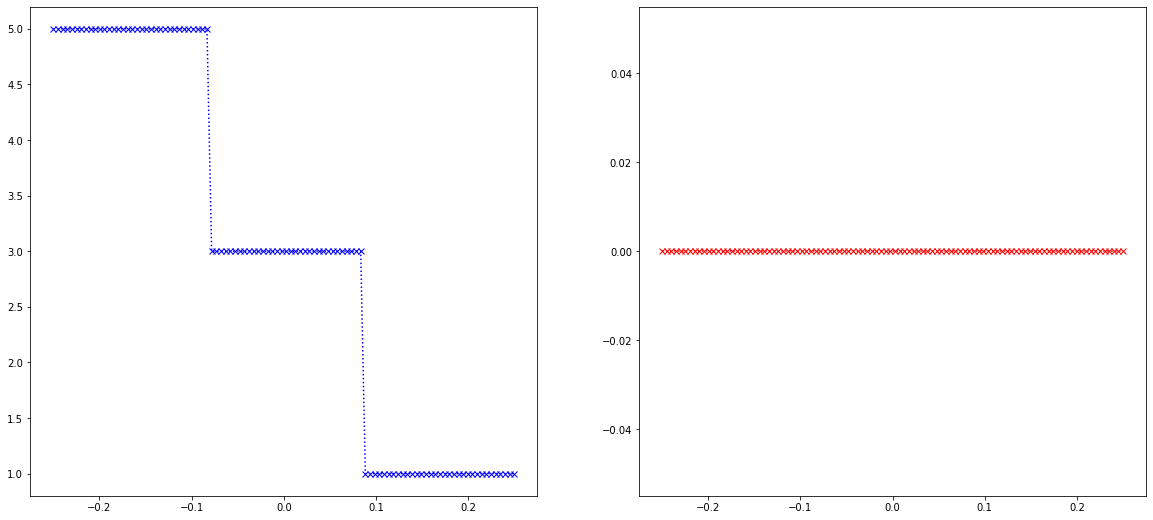

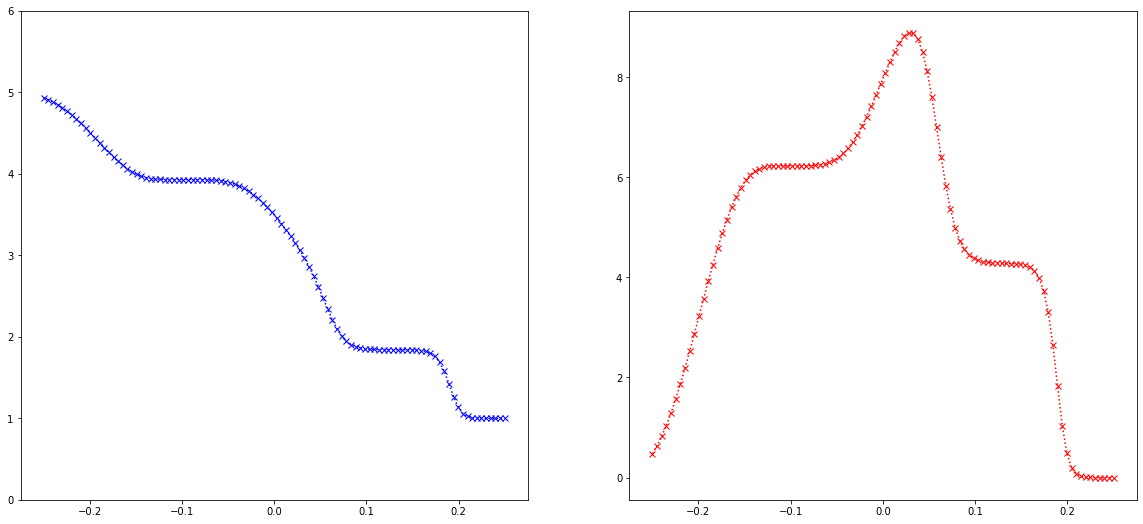

In [28]:
# constants
grav = 9.81

# domain
N = 100
Nt = 200
dx = 0.005
dt = 0.0001
dtdx = dt/dx

x_start = -N/2*dx #-5.
#x_start = 0
x = np.linspace(x_start, x_start + dx*N, N)


# initial conditions
# q = [h, hu]
# POZOR, MUSI BYT CELOU DOBU KLADNA A TO I PO PROHNANI RESICEM
q_state = np.zeros([2,N])

for i in range(N):
    if i < N/3:
        q_state[0,i] = 5
    elif N/3 <= i < 2*N/3:
        q_state[0,i] = 3
    else: 
        q_state[0,i] = 1

#q_state[0,0:int(N/2)] = 4
#q_state[0,int(N/2):] = 1
#q_state[0,:] = .1 * np.sin(np.linspace(0,4*np.pi,N)) +1


# problem_data
problem_data = {'grav' : grav,
               'efix' : False}
aux_l, aux_r = 0, 0
#print(q_state)

plt.subplot(1, 2, 1)
plt.plot(x, q_state[0,:], 'bx:')
plt.subplot(1, 2, 2)
plt.plot(x, q_state[1,:], 'rx:')
plt.show()

# run Roe solver
for i in range(Nt):
    q_l = q_state[:,:-1]
    q_r = q_state[:,1:]

    #wave, s, amdq, apdq = shallow_roe_1D(q_l, q_r, aux_l, aux_r, problem_data)
    wave, s, amdq, apdq = shallow_hll_1D(q_l, q_r, aux_l, aux_r, problem_data)
    
    q_state[:,:-1] = q_state[:,:-1] - dtdx * amdq
    q_state[:,1:] = q_state[:,1:] - dtdx * apdq
    
    #high-resolution
    #q_state[:,:-1] = q_state[:,:-1] - dtdx * (1/2. *     
    #print(q_state)

plt.subplot(1, 2, 1)
plt.plot(x, q_state[0,:], 'bx:')
plt.ylim([0,6])
plt.subplot(1, 2, 2)
plt.plot(x, q_state[1,:], 'rx:')
plt.show()

g_state = np.copy(q_state)

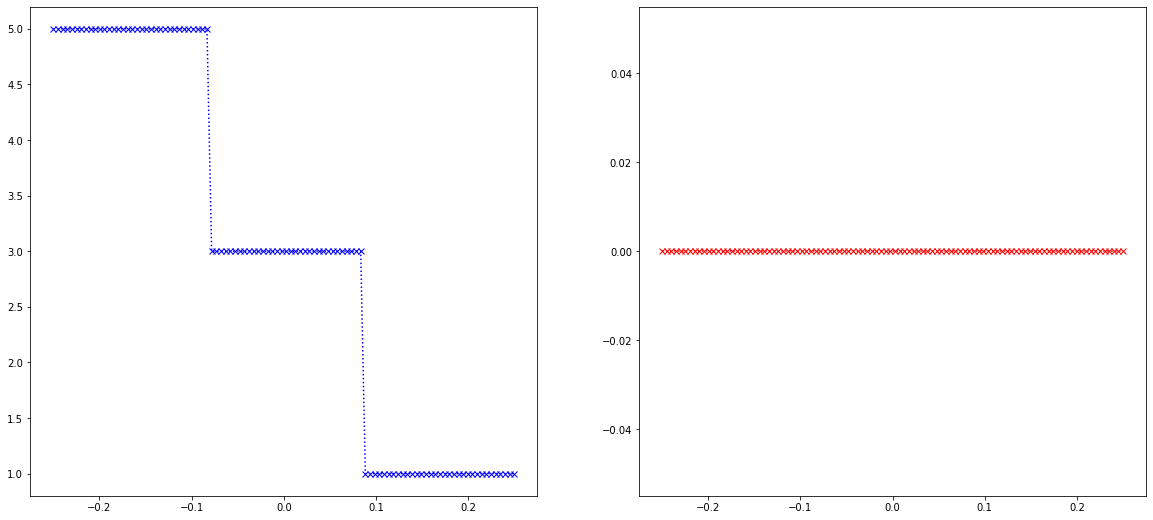

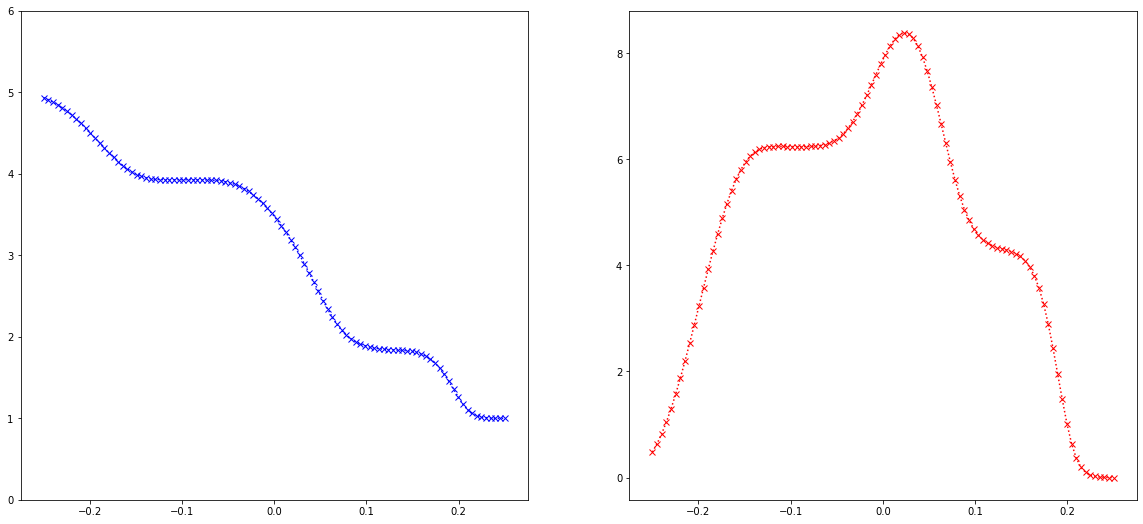

In [30]:
# constants
grav = 9.81

# domain
N = 100
Nt = 200
dx = 0.005
dt = 0.0001
dtdx = dt/dx


dtdx_array = np.full(N, dtdx)
limiters = np.full(N,tvd.minmod)

x_start = -N/2*dx #-5.
#x_start = 0
x = np.linspace(x_start, x_start + dx*N, N)


# initial conditions
# q = [h, hu]
# POZOR, MUSI BYT CELOU DOBU KLADNA A TO I PO PROHNANI RESICEM
q_state = np.zeros([2,N])

for i in range(N):
    if i < N/3:
        q_state[0,i] = 5
    elif N/3 <= i < 2*N/3:
        q_state[0,i] = 3
    else: 
        q_state[0,i] = 1
    
#q_state[0,0:int(N/2)] = 4
#q_state[0,int(N/2):] = 1
#q_state[0,:] = .1 * np.sin(np.linspace(0,4*np.pi,N)) +1


# problem_data
problem_data = {'grav' : grav,
               'efix' : False}
aux_l, aux_r = 0, 0
#print(q_state)

plt.subplot(1, 2, 1)
plt.plot(x, q_state[0,:], 'bx:')
plt.subplot(1, 2, 2)
plt.plot(x, q_state[1,:], 'rx:')
plt.show()

# run Roe solver
for i in range(Nt):
    q_l = q_state[:,:-1]
    q_r = q_state[:,1:]

    #wave, s, amdq, apdq = shallow_roe_1D(q_l, q_r, aux_l, aux_r, problem_data)
    wave, s, amdq, apdq = shallow_hll_1D(q_l, q_r, aux_l, aux_r, problem_data)
    
    q_state[:,:-1] = q_state[:,:-1] - dtdx * amdq
    q_state[:,1:] = q_state[:,1:] - dtdx * apdq
    
    #high-resolution
    
    
    wave_lim = tvd.limit(2,wave,s,limiters,dtdx_array)
    
    F = np.zeros([2,N-1])
    w_num = wave.shape[1]
    for e in range(2):
        for i in range(N-1):
            for j in range(w_num):
                F[e,i] = 1/2 * np.abs(s[j,i])*(1-dtdx*np.abs(s[j,i]))*wave_lim[e,j,i]
                
    q_state[:,:-1] = q_state[:,:-1] + dtdx * F
    q_state[:,1:] = q_state[:,1:] - dtdx * F
    
plt.subplot(1, 2, 1)
plt.plot(x, q_state[0,:], 'bx:')
plt.ylim([0,6])
plt.subplot(1, 2, 2)
plt.plot(x, q_state[1,:], 'rx:')
plt.show()


<ipython-input-31-8447850fc4e4>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-31-8447850fc4e4>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


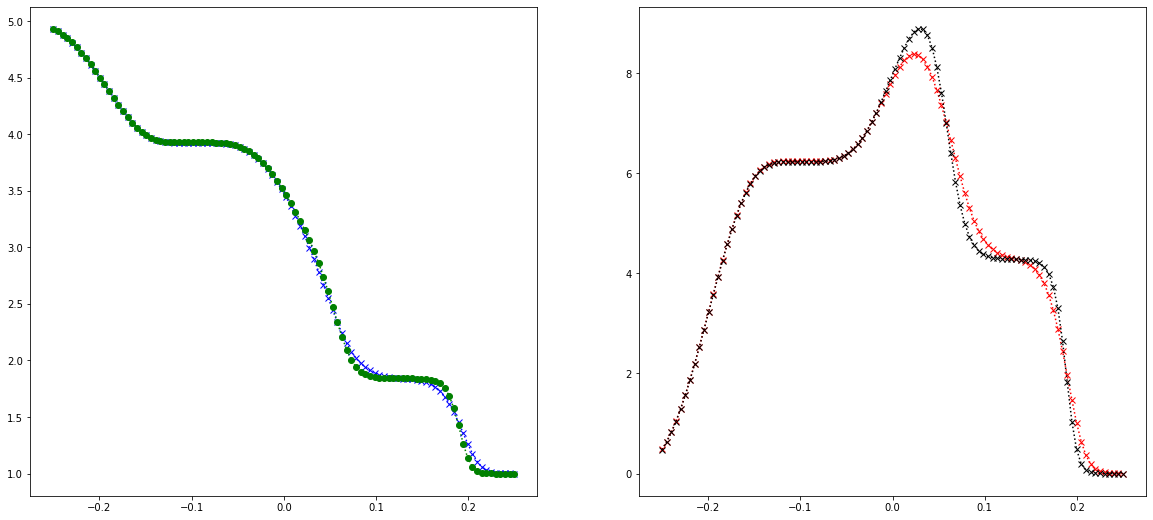

In [31]:
plt.subplot(1, 2, 1)
plt.plot(x, q_state[0,:], 'bx:')

plt.subplot(1, 2, 1)
plt.plot(x, g_state[0,:], 'go:')


plt.subplot(1, 2, 2)
plt.plot(x, q_state[1,:], 'rx:')
plt.subplot(1, 2, 2)
plt.plot(x, g_state[1,:], 'kx:')
plt.show()